The goal of this notebook is to check if the result from the first iteration makes sense or not. We will narrow down the range for identifty the optimization after this.

In [1]:
import sys
print (sys.version)

2.7.12 |Anaconda 4.2.0 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


In [48]:
#Specify data directories
DataDir = r'C:/Users/Admin/Dropbox/Solar NEM (ERI)/Data manipulation/'
OutputDir = r'C:/Users/Admin/Dropbox/Solar NEM (ERI)/PEA_Solar_hotspot_paper/output/'

#Specify SDK directory
SDKdir = r"C:/Users/Admin/Downloads/sam-sdk-2016-3-14-r3/languages/python/"

#Import necessary Python libraries
import site
site.addsitedir(SDKdir)
from PySSC import PySSC

import csv
import os
import numpy
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
output_filenames = os.listdir(OutputDir+'second_iteration/')

In [4]:
#we focus only on NPV
Value = 'NPV'
df = pd.read_csv(OutputDir + 'optimal_'+ Value + '_second_iteration.csv')

In [5]:
len(df)

3465

In [6]:
df

,Province_code,Customer type,Scheme,Sensitivity,Province,system_size,NEM sales rate,Region,Annual energy,Annual load,...,LCOE (nominal),LCOE (real),Bill without system,Bill with system,Net saving with system,NPV,Payback period,IRR,Net capital cost,PV/load ratio
0,31,LGS,1,1,ARANYAPRATHET,4200.0,0.0,16,5.695329e+06,1.179401e+07,...,10.510671,8.408707,1.092156e+06,650971.312500,441184.187500,2.395650e+06,8.918200,0.134303,4788000,0.482900
1,25,LGS,1,1,CHAIYAPHUM,3600.0,0.0,15,5.073026e+06,1.084624e+07,...,10.114289,8.091596,9.893934e+05,612025.375000,377368.000000,2.141645e+06,8.871361,0.135717,4104000,0.467722
2,32,LGS,1,1,CHANTHABURI,4300.0,0.0,16,4.857595e+06,1.179401e+07,...,12.616739,10.093596,1.092156e+06,678352.937500,413802.562500,1.401769e+06,9.815556,0.118000,4902000,0.411870
3,17,LGS,1,1,CHIANG-MAI,1800.0,0.0,14,2.557632e+06,4.609564e+06,...,10.030775,8.024783,4.374128e+05,244386.500000,193026.343800,1.211766e+06,8.656057,0.140407,2052000,0.554853
4,17,LGS,1,1,CHIANG-RAI,1800.0,0.0,14,2.505523e+06,4.609564e+06,...,10.239391,8.191679,4.374128e+05,246702.890600,190709.953100,1.152370e+06,8.755051,0.138414,2052000,0.543549
5,31,LGS,1,1,CHON-BURI,4200.0,0.0,16,5.751120e+06,1.179401e+07,...,10.408707,8.327134,1.092156e+06,650968.687500,441186.812500,2.446918e+06,8.902549,0.134968,4788000,0.487631
6,25,LGS,1,1,CHUMPHON,4600.0,0.0,17,5.331460e+06,1.178964e+07,...,12.297354,9.838082,1.088562e+06,636035.625000,452526.500000,1.839672e+06,9.478482,0.123200,5244000,0.452216
7,25,LGS,1,1,HAT-YAI,4600.0,0.0,17,5.469541e+06,1.178964e+07,...,11.986901,9.589715,1.088562e+06,628135.562500,460426.562500,2.014066e+06,9.297116,0.125888,5244000,0.463928
8,33,LGS,1,1,HUA-HIN,4400.0,0.0,17,6.020912e+06,1.178964e+07,...,10.415746,8.332766,1.088562e+06,622697.500000,465864.625000,2.733211e+06,8.785639,0.137375,5016000,0.510695
9,17,LGS,1,1,KAM-PAENG-PHET,1800.0,0.0,14,2.432921e+06,4.609564e+06,...,10.544948,8.436129,4.374128e+05,248210.390600,189202.453100,1.078496e+06,8.843627,0.136057,2052000,0.527799


In [7]:
Customers = ['Res','Res_TOU','SGS','SGS_TOU','MGS','LGS', 'LGS_BOI']
Schemes = [1,2,3] # 1. Pilot, 2. Net Metering/ NEM, 3. Net billing/ real-time buyback
Sensitivities = [1,2,3] #1 = below retail/ wholesale, 2 = retail/central case, 3 = above retail/ percent add-on

In [8]:
df.columns

Index([u'Province_code', u'Customer type', u'Scheme', u'Sensitivity',
       u'Province', u'system_size', u'NEM sales rate', u'Region',
       u'Annual energy', u'Annual load', u'Capacity factor', u'Energy yield',
       u'LCOE (nominal)', u'LCOE (real)', u'Bill without system',
       u'Bill with system', u'Net saving with system', u'NPV',
       u'Payback period', u'IRR', u'Net capital cost', u'PV/load ratio'],
      dtype='object')

In [9]:
df[(df['Customer type'] == 'Res')&(df['Scheme'] == 3)&(df.Sensitivity == 3)].head()

,Province_code,Customer type,Scheme,Sensitivity,Province,system_size,NEM sales rate,Region,Annual energy,Annual load,...,LCOE (nominal),LCOE (real),Bill without system,Bill with system,Net saving with system,NPV,Payback period,IRR,Net capital cost,PV/load ratio
1925,37,Res,3,3,ARANYAPRATHET,20.0,0.0,16,27120.61523,7085.544922,...,12.564874,9.629726,763.089233,-1649.766357,2412.855469,15584.542970,12.747557,0.081021,38600,3.827598
1926,37,Res,3,3,CHAIYAPHUM,20.0,0.0,15,28183.47656,6020.249512,...,12.091023,9.266567,638.428162,-1854.860962,2493.289063,17535.226560,12.418880,0.084276,38600,4.681447
1927,37,Res,3,3,CHANTHABURI,20.0,0.0,16,22593.46484,7085.544922,...,15.082551,11.559276,763.089233,-1261.426758,2024.515991,6082.115234,14.608127,0.064213,38600,3.188670
1928,37,Res,3,3,CHIANG-MAI,20.0,0.0,14,28418.12891,4860.086914,...,11.991187,9.190053,503.896027,-1983.499512,2487.395508,17015.572270,12.474982,0.083494,38600,5.847247
1929,37,Res,3,3,CHIANG-RAI,20.0,0.0,14,27839.14063,4860.086914,...,12.240576,9.381184,503.896027,-1934.017090,2437.913086,15804.019530,12.677201,0.081470,38600,5.728116


In [10]:
df[(df['Customer type'] == 'Res')&(df['Scheme'] == 3)&(df.Sensitivity == 1)].head()

,Province_code,Customer type,Scheme,Sensitivity,Province,system_size,NEM sales rate,Region,Annual energy,Annual load,...,LCOE (nominal),LCOE (real),Bill without system,Bill with system,Net saving with system,NPV,Payback period,IRR,Net capital cost,PV/load ratio
1815,28,Res,3,1,ARANYAPRATHET,2.9,0.0,16,3932.489258,7085.544922,...,12.564873,9.629725,763.089233,442.661346,320.427887,3136.408203,12.480030,0.088646,5597,0.555002
1816,25,Res,3,1,CHAIYAPHUM,2.6,0.0,15,3663.852051,6020.249512,...,12.091024,9.266568,638.428162,345.331696,293.096466,3133.269043,12.196130,0.092105,5018,0.608588
1817,27,Res,3,1,CHANTHABURI,2.8,0.0,16,3163.084961,7085.544922,...,15.082551,11.559276,763.089233,476.132172,286.957062,1997.077148,13.349448,0.077810,5404,0.446414
1818,19,Res,3,1,CHIANG-MAI,1.8,0.0,14,2557.631592,4860.086914,...,11.991187,9.190053,503.896027,303.234802,200.661224,2147.075684,12.259456,0.091630,3474,0.526252
1819,19,Res,3,1,CHIANG-RAI,1.8,0.0,14,2505.522461,4860.086914,...,12.240576,9.381185,503.896027,305.424255,198.471771,2060.344727,12.366079,0.090292,3474,0.515530


## Visualization: Optimal size

In [11]:
Customer = 'LGS'
#Scheme = Schemes[0]
#Sensitivity = Sensitivities[0]

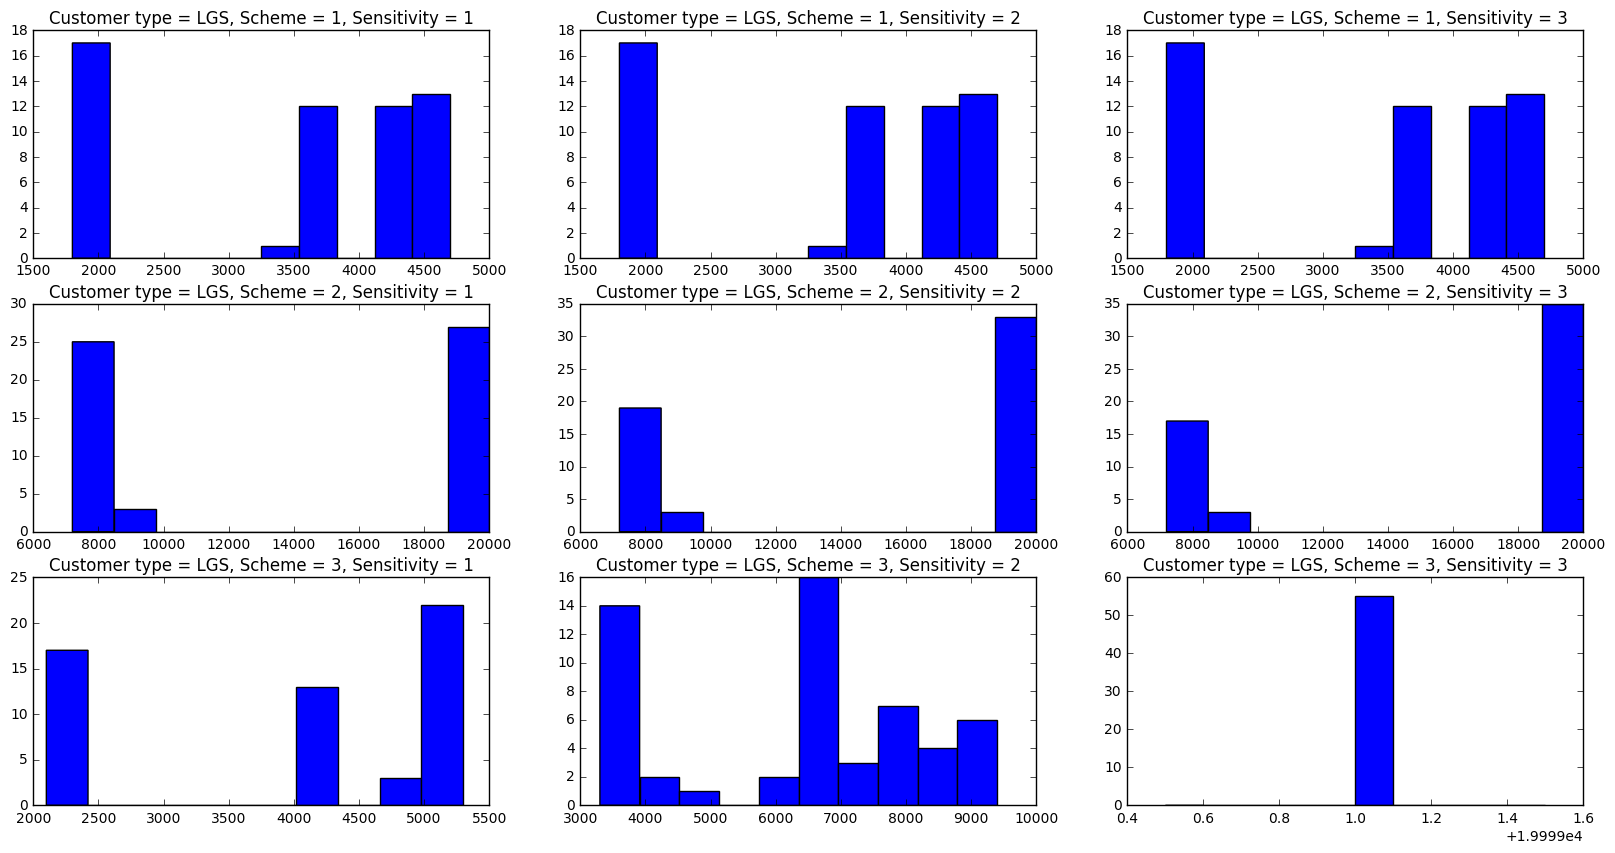

In [12]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(331)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[0])&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm.system_size)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[0]) + ', Sensitivity = ' + str(Sensitivities[0]))

ax1 = plt.subplot(332)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[0])&(df['Sensitivity']==Sensitivities[1])]
ax1.hist(d_imm.system_size)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[0]) + ', Sensitivity = ' + str(Sensitivities[1]))

ax1 = plt.subplot(333)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[0])&(df['Sensitivity']==Sensitivities[2])]
ax1.hist(d_imm.system_size)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[0]) + ', Sensitivity = ' + str(Sensitivities[2]))

ax1 = plt.subplot(334)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[1])&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm.system_size)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[1]) + ', Sensitivity = ' + str(Sensitivities[0]))

ax1 = plt.subplot(335)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[1])&(df['Sensitivity']==Sensitivities[1])]
ax1.hist(d_imm.system_size)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[1]) + ', Sensitivity = ' + str(Sensitivities[1]))

ax1 = plt.subplot(336)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[1])&(df['Sensitivity']==Sensitivities[2])]
ax1.hist(d_imm.system_size)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[1]) + ', Sensitivity = ' + str(Sensitivities[2]))

ax1 = plt.subplot(337)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[2])&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm.system_size)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[2]) + ', Sensitivity = ' + str(Sensitivities[0]))

ax1 = plt.subplot(338)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[2])&(df['Sensitivity']==Sensitivities[1])]
ax1.hist(d_imm.system_size)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[2]) + ', Sensitivity = ' + str(Sensitivities[1]))

ax1 = plt.subplot(339)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[2])&(df['Sensitivity']==Sensitivities[2])]
ax1.hist(d_imm.system_size)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[2]) + ', Sensitivity = ' + str(Sensitivities[2]))

In [62]:
Customer = 'LGS'
xmax = 20*1.05
ymax = 60
Scheme = 3
#Sensitivity = Sensitivities[0]

In [63]:
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[0])]
print np.mean(d_imm.system_size)

d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[1])]
print np.mean(d_imm.system_size)

d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[2])]
print np.mean(d_imm.system_size)

3972.72727273
6290.90909091
20000.0


(0, 60)

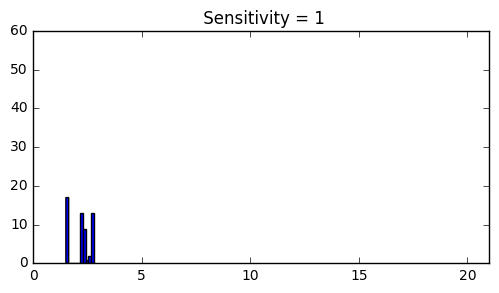

In [23]:
fig = plt.figure(figsize=(20,3))
ax1 = plt.subplot(131)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm.system_size)
ax1.set_title(' Sensitivity = ' + str(Sensitivities[0]))
ax1.set_xlim(0,xmax)
ax1.set_ylim(0,ymax)

# ax1 = plt.subplot(132)
# d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[1])]
# ax1.hist(d_imm.system_size)
# ax1.set_title(' Sensitivity = ' + str(Sensitivities[1]))
# ax1.set_xlim(0,xmax)
# ax1.set_ylim(0,ymax)

# ax1 = plt.subplot(133)
# d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[2])]
# ax1.hist(d_imm.system_size)
# ax1.set_title(' Sensitivity = ' + str(Sensitivities[2]))
# ax1.set_xlim(0,xmax)
# ax1.set_ylim(0,ymax)


## Visualization: NPV

In [78]:
Customer = 'Res'
#xmax = 18000*1.05
#xmax = 1e6*1.05
xmax = 1.2e7*1.05
ymax = 20
Scheme = 1
#Sensitivity = Sensitivities[0]

In [79]:
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[0])]
print np.mean(d_imm.NPV)

d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[1])]
print np.mean(d_imm.NPV)

d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[2])]
print np.mean(d_imm.NPV)

2249.46556513
2249.46556513
2249.46556513


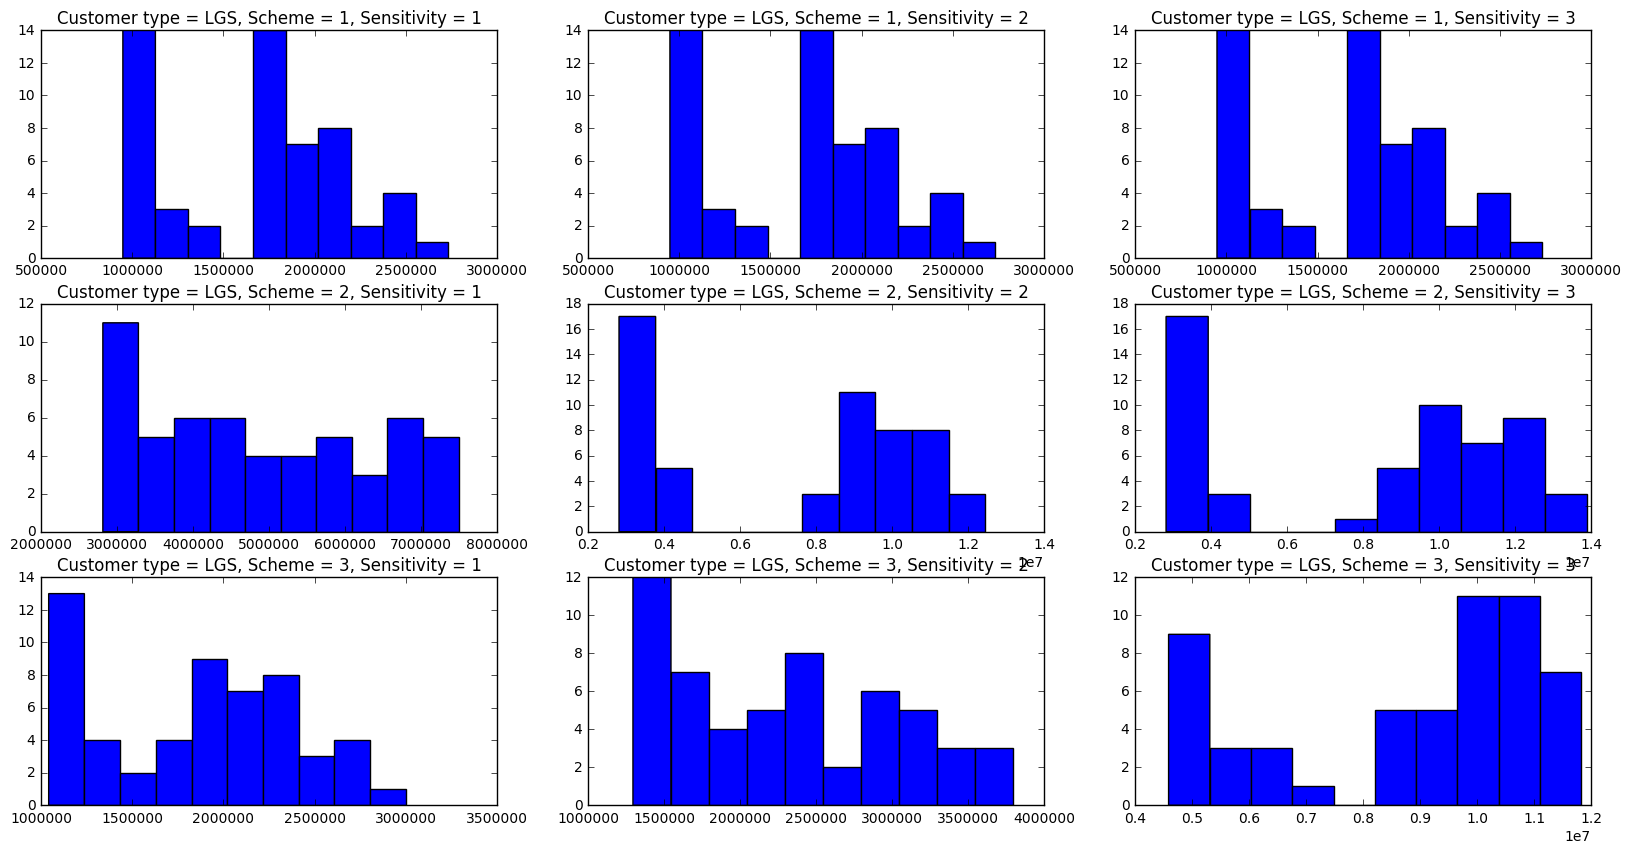

In [33]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(331)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[0])&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm.NPV)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[0]) + ', Sensitivity = ' + str(Sensitivities[0]))

ax1 = plt.subplot(332)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[0])&(df['Sensitivity']==Sensitivities[1])]
ax1.hist(d_imm.NPV)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[0]) + ', Sensitivity = ' + str(Sensitivities[1]))

ax1 = plt.subplot(333)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[0])&(df['Sensitivity']==Sensitivities[2])]
ax1.hist(d_imm.NPV)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[0]) + ', Sensitivity = ' + str(Sensitivities[2]))

ax1 = plt.subplot(334)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[1])&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm.NPV)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[1]) + ', Sensitivity = ' + str(Sensitivities[0]))

ax1 = plt.subplot(335)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[1])&(df['Sensitivity']==Sensitivities[1])]
ax1.hist(d_imm.NPV)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[1]) + ', Sensitivity = ' + str(Sensitivities[1]))

ax1 = plt.subplot(336)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[1])&(df['Sensitivity']==Sensitivities[2])]
ax1.hist(d_imm.NPV)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[1]) + ', Sensitivity = ' + str(Sensitivities[2]))

ax1 = plt.subplot(337)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[2])&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm.NPV)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[2]) + ', Sensitivity = ' + str(Sensitivities[0]))

ax1 = plt.subplot(338)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[2])&(df['Sensitivity']==Sensitivities[1])]
ax1.hist(d_imm.NPV)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[2]) + ', Sensitivity = ' + str(Sensitivities[1]))

ax1 = plt.subplot(339)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[2])&(df['Sensitivity']==Sensitivities[2])]
ax1.hist(d_imm.NPV)
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[2]) + ', Sensitivity = ' + str(Sensitivities[2]))

(0, 20)

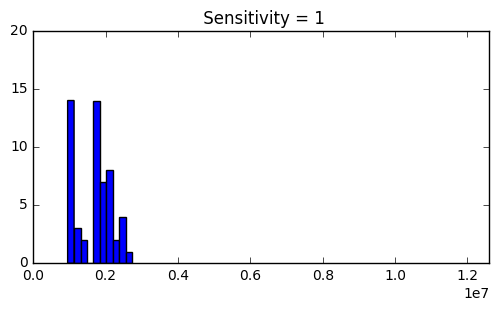

In [34]:
fig = plt.figure(figsize=(20,3))
ax1 = plt.subplot(131)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm.NPV)
ax1.set_title(' Sensitivity = ' + str(Sensitivities[0]))
ax1.set_xlim(0,xmax)
ax1.set_ylim(0,ymax)

# ax1 = plt.subplot(132)
# d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[1])]
# ax1.hist(d_imm.NPV)
# ax1.set_title(' Sensitivity = ' + str(Sensitivities[1]))
# ax1.set_xlim(0,xmax)
# ax1.set_ylim(0,ymax)

# ax1 = plt.subplot(133)
# d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[2])]
# ax1.hist(d_imm.NPV)
# ax1.set_title(' Sensitivity = ' + str(Sensitivities[2]))
# ax1.set_xlim(0,xmax)
# ax1.set_ylim(0,ymax)

## Visualization: PV/load ratio

In [94]:
Customer = 'LGS'
xmax = 7
#xmax = 3.5*1.05
#xmax = 6.5*1.05#1.2e7*1.05
ymax = 25
Scheme = 1
#Sensitivity = Sensitivities[0]

In [95]:
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[0])]
print np.mean(d_imm['PV/load ratio'])

d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[1])]
print np.mean(d_imm['PV/load ratio'])

d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[2])]
print np.mean(d_imm['PV/load ratio'])

0.479960264145
0.479960264145
0.479960264145


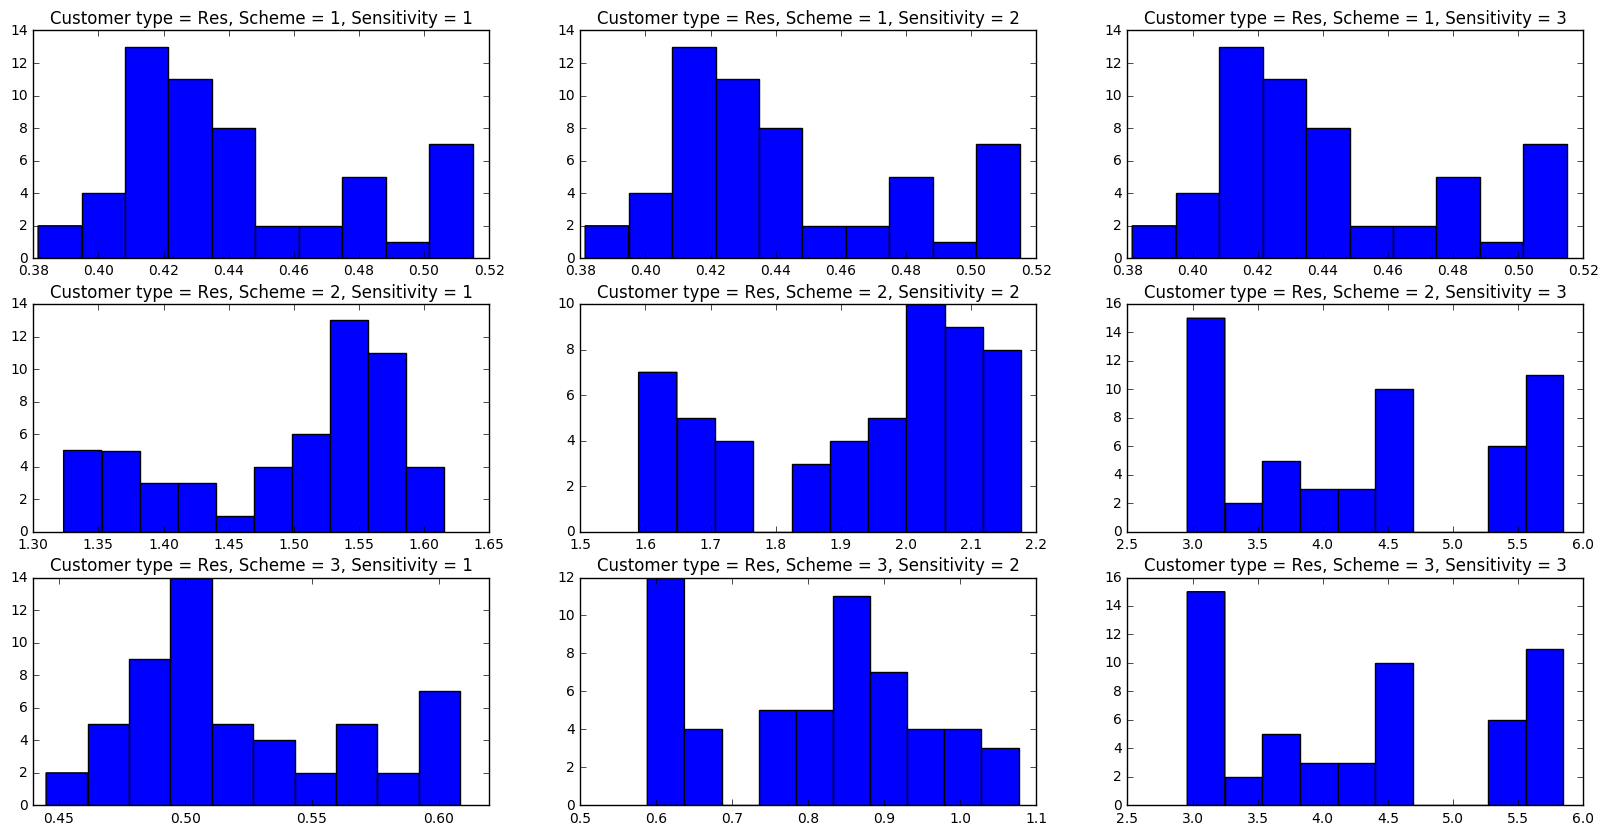

In [45]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(331)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[0])&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm['PV/load ratio'])
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[0]) + ', Sensitivity = ' + str(Sensitivities[0]))

ax1 = plt.subplot(332)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[0])&(df['Sensitivity']==Sensitivities[1])]
ax1.hist(d_imm['PV/load ratio'])
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[0]) + ', Sensitivity = ' + str(Sensitivities[1]))

ax1 = plt.subplot(333)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[0])&(df['Sensitivity']==Sensitivities[2])]
ax1.hist(d_imm['PV/load ratio'])
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[0]) + ', Sensitivity = ' + str(Sensitivities[2]))

ax1 = plt.subplot(334)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[1])&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm['PV/load ratio'])
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[1]) + ', Sensitivity = ' + str(Sensitivities[0]))

ax1 = plt.subplot(335)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[1])&(df['Sensitivity']==Sensitivities[1])]
ax1.hist(d_imm['PV/load ratio'])
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[1]) + ', Sensitivity = ' + str(Sensitivities[1]))

ax1 = plt.subplot(336)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[1])&(df['Sensitivity']==Sensitivities[2])]
ax1.hist(d_imm['PV/load ratio'])
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[1]) + ', Sensitivity = ' + str(Sensitivities[2]))

ax1 = plt.subplot(337)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[2])&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm['PV/load ratio'])
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[2]) + ', Sensitivity = ' + str(Sensitivities[0]))

ax1 = plt.subplot(338)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[2])&(df['Sensitivity']==Sensitivities[1])]
ax1.hist(d_imm['PV/load ratio'])
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[2]) + ', Sensitivity = ' + str(Sensitivities[1]))

ax1 = plt.subplot(339)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Schemes[2])&(df['Sensitivity']==Sensitivities[2])]
ax1.hist(d_imm['PV/load ratio'])
ax1.set_title('Customer type = ' + str(Customer) + ', Scheme = ' + str(Schemes[2]) + ', Sensitivity = ' + str(Sensitivities[2]))

(0, 25)

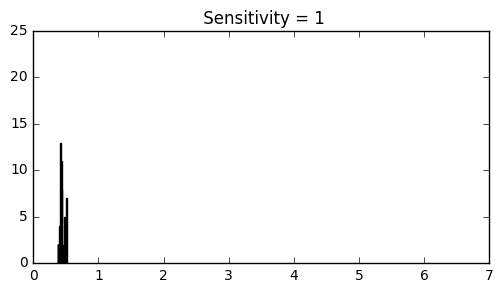

In [46]:
fig = plt.figure(figsize=(20,3))
ax1 = plt.subplot(131)
d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[0])]
ax1.hist(d_imm['PV/load ratio'])
ax1.set_title(' Sensitivity = ' + str(Sensitivities[0]))
ax1.set_xlim(0,xmax)
ax1.set_ylim(0,ymax)

# ax1 = plt.subplot(132)
# d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[1])]
# ax1.hist(d_imm['PV/load ratio'])
# ax1.set_title(' Sensitivity = ' + str(Sensitivities[1]))
# ax1.set_xlim(0,xmax)
# ax1.set_ylim(0,ymax)

# ax1 = plt.subplot(133)
# d_imm = df[(df['Customer type']==Customer)&(df['Scheme']==Scheme)&(df['Sensitivity']==Sensitivities[2])]
# ax1.hist(d_imm['PV/load ratio'])
# ax1.set_title(' Sensitivity = ' + str(Sensitivities[2]))
# ax1.set_xlim(0,xmax)
# ax1.set_ylim(0,ymax)

## Optimization illustration

In [99]:
#read all data as a data frame. This can be long due to large number of files
df = pd.DataFrame()
for output_filename in output_filenames:
    filename = OutputDir + 'second_iteration/'+ output_filename
    df = pd.concat([df,pd.read_csv(filename)])

In [100]:
len(df)

133272

In [101]:
df.columns

Index([u'Customer type', u'Scheme', u'Sensitivity', u'Province',
       u'system_size', u'NEM sales rate', u'Region', u'Annual energy',
       u'Annual load', u'Capacity factor', u'Energy yield', u'LCOE (nominal)',
       u'LCOE (real)', u'Bill without system', u'Bill with system',
       u'Net saving with system', u'NPV', u'Payback period', u'IRR',
       u'Net capital cost'],
      dtype='object')

Here one can query the data with customer type, scheme, sensitivity using values directly. The query for specific weather stations requires a little bit of syntax.

In [102]:
#Possible values for query
Customer = 'MGS' # Choose from ['Res','Res_TOU','SGS','SGS_TOU','MGS','LGS', 'LGS_BOI']
Scheme = 3 # Choose from [1,2,3] 1. Pilot, 2. Net Metering/ NEM, 3. Net billing/ real-time buyback
Sensitivity = 1 #1 = below retail/ wholesale, 2 = retail/central case, 3 = above retail/ percent add-on
Province = 'UTTARADIT' # Choose from ["UTTARADIT","TAK","MAE-SOT","PHRAE","PHITSANULOK", 
# 				"PHETCHABUN", "PHAYAO", "NAN", "NAKHON-SAWAN", "MAE-SARIANG", "MAE-HONG-SON", "LOP-BURI", 
#               "LAMPHUN", "LAMPANG",  "KAM-PAENG-PHET","CHIANG-RAI", "CHIANG-MAI","UDON-THANI", "UBON-RATCHATHANI", 
#               "THA-TUM", "SURIN", "SAKON-NAKHON", "ROI-ET", "NONG-KHAI", "NAKHON-RATCHASIMA", "NAKHON-PHANOM", 
# 				"MUKDAHAN", "LOEI", "KHON-KAEN", "CHAIYAPHUM", "ARANYAPRATHET", "THONG-PHA-PHUM", "SUPHAN-BURI", "SATTAHIP", 
# 				"PRACHIN-BURI", "KO-SICHANG", "KHLONG-YAI", "KANCHANABURI", "CHON-BURI", "CHANTHABURI",
#                 "TRANG", "SURAT-THANI", "SONGKHLA", "RANONG", "PRACHUAP-KHIRIKHAN", 
# 				"PHUKET-AP", "PHUKET", "PATTANI", "NARATHIWAT", "NAKHON-SI-THAMMARAT", 
# 				"KO-SAMUI", "KO-LANTA", "HUA-HIN", "HAT-YAI", "CHUMPHON"]

In [103]:
#Query without region
df_small = df[(df['Customer type'] == Customer)&(df['Scheme'] == Scheme)&(df['Sensitivity'] == Sensitivity)]

#Query with region
df_small = df[(df['Customer type'] == Customer)&(df['Scheme'] == Scheme)&(df['Sensitivity'] == Sensitivity)\
             &(df['Province']==Province)]

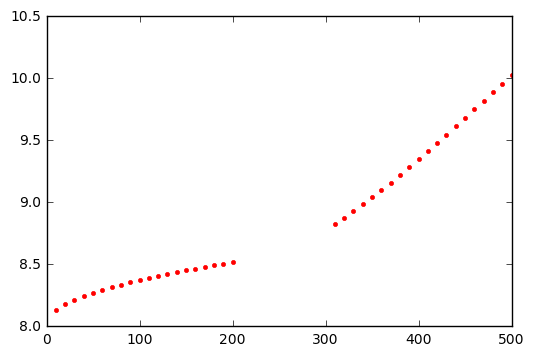

In [104]:
plt.plot(df_small['system_size'], df_small['Payback period'],'.',color = 'red') 

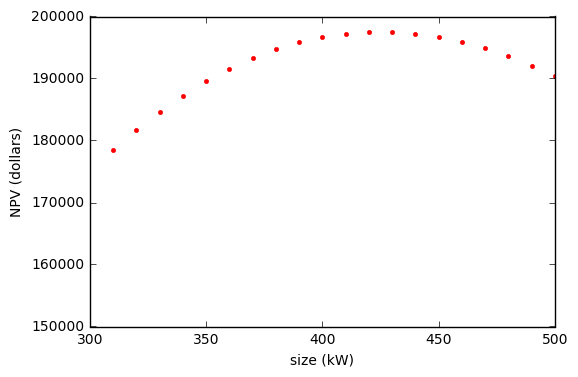

In [111]:
plt.plot(df_small['system_size'], df_small['NPV'],'.',color = 'red') 
plt.xlim(300,500)
plt.ylim(150000,200000)
plt.xlabel('size (kW)')
plt.ylabel('NPV (dollars)')

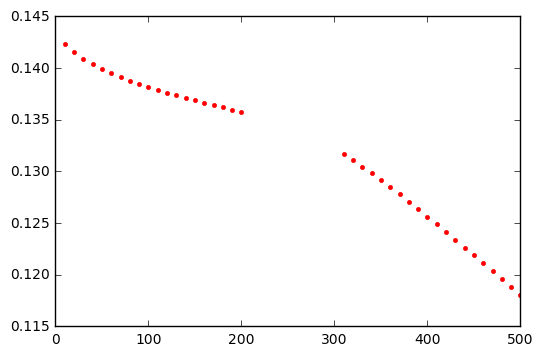

In [19]:
plt.plot(df_small['system_size'], df_small['IRR'],'.',color = 'red') 

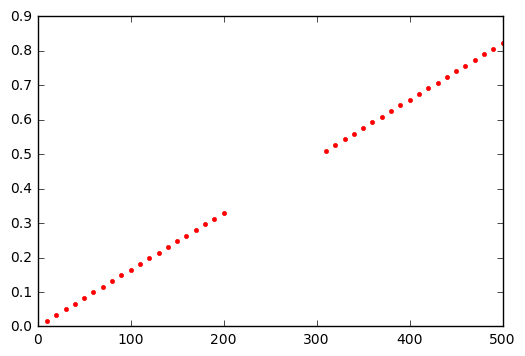

In [20]:
plt.plot(df_small['system_size'], df_small['Annual energy']/df_small['Annual load'],'.',color = 'red') 

Next we conclude the optimal in the second iteration. We may use this value for the next iteration if you'd like.

In [21]:
Value = 'Payback period'
idx = df[['Customer type','Scheme','Sensitivity','Province','system_size']+[Value]]\
     .groupby(['Customer type','Scheme','Sensitivity','Province'])[Value].transform(min) == df[Value]
df_extreme = df[idx]
df_extreme.to_csv(OutputDir + 'optimal_'+ Value + '_second_iteration.csv')

In [22]:
Value = 'NPV'
idx = df[['Customer type','Scheme','Sensitivity','Province','system_size']+[Value]]\
     .groupby(['Customer type','Scheme','Sensitivity','Province'])[Value].transform(max) == df[Value]
df_extreme = df[idx]
df_extreme.to_csv(OutputDir + 'optimal_'+ Value + '_second_iteration.csv')

In [23]:
Value = 'IRR'
idx = df[['Customer type','Scheme','Sensitivity','Province','system_size']+[Value]]\
     .groupby(['Customer type','Scheme','Sensitivity','Province'])[Value].transform(max) == df[Value]
df_extreme = df[idx]
df_extreme.to_csv(OutputDir + 'optimal_'+ Value + '_second_iteration.csv')

Here are some query examples on optimal values.

In [24]:
#Query without region
df_small = df_extreme[(df_extreme['Customer type'] == Customer)&(df_extreme['Scheme'] == Scheme)\
                      &(df_extreme['Sensitivity'] == Sensitivity)]

In [25]:
#Example of data query
#df_small[['Region','system_size',Value]]

In [26]:
df_small = df_extreme[(df_extreme['Customer type'] == Customer)]
set(df_small['system_size'])

{10.0}